# import the library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load the data set

In [2]:
df=pd.read_csv('Walmart_sales.csv')
df.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


# check the shape of data set

In [3]:
df.shape

(6435, 8)

# Data Preprocessing

# Handling null value

In [4]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

# Fetch the duplicates value

In [5]:
df.duplicated().sum()

0

# check the data type

In [6]:
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

# change the data type of Date column from object to date time data type

In [7]:
df['Date']=pd.to_datetime(df['Date'],dayfirst=True)

In [8]:
df.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

# Extract the day,month & year from date column

In [9]:
df['Day']=df['Date'].dt.day
df['month']=df['Date'].dt.month
df['year']=df['Date'].dt.year

In [10]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,month,year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010


In [11]:
df.drop('Date',axis=1,inplace=True)

In [12]:
df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010
...,...,...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,5,10,2012
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,12,10,2012
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012


# check the statistical behaviour of numerical column

In [13]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,month,year
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,15.678322,6.447552,2010.965035
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,8.755780,3.238308,0.797019
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,1.000000,1.000000,2010.000000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,8.000000,4.000000,2010.000000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,16.000000,6.000000,2011.000000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,23.000000,9.000000,2012.000000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,31.000000,12.000000,2012.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
 7   Day           6435 non-null   int32  
 8   month         6435 non-null   int32  
 9   year          6435 non-null   int32  
dtypes: float64(5), int32(3), int64(2)
memory usage: 427.5 KB


# visualize the year wise weekly_sales

In [15]:
num_col=df.select_dtypes(exclude='object').columns
print(num_col)

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment', 'Day', 'month', 'year'],
      dtype='object')


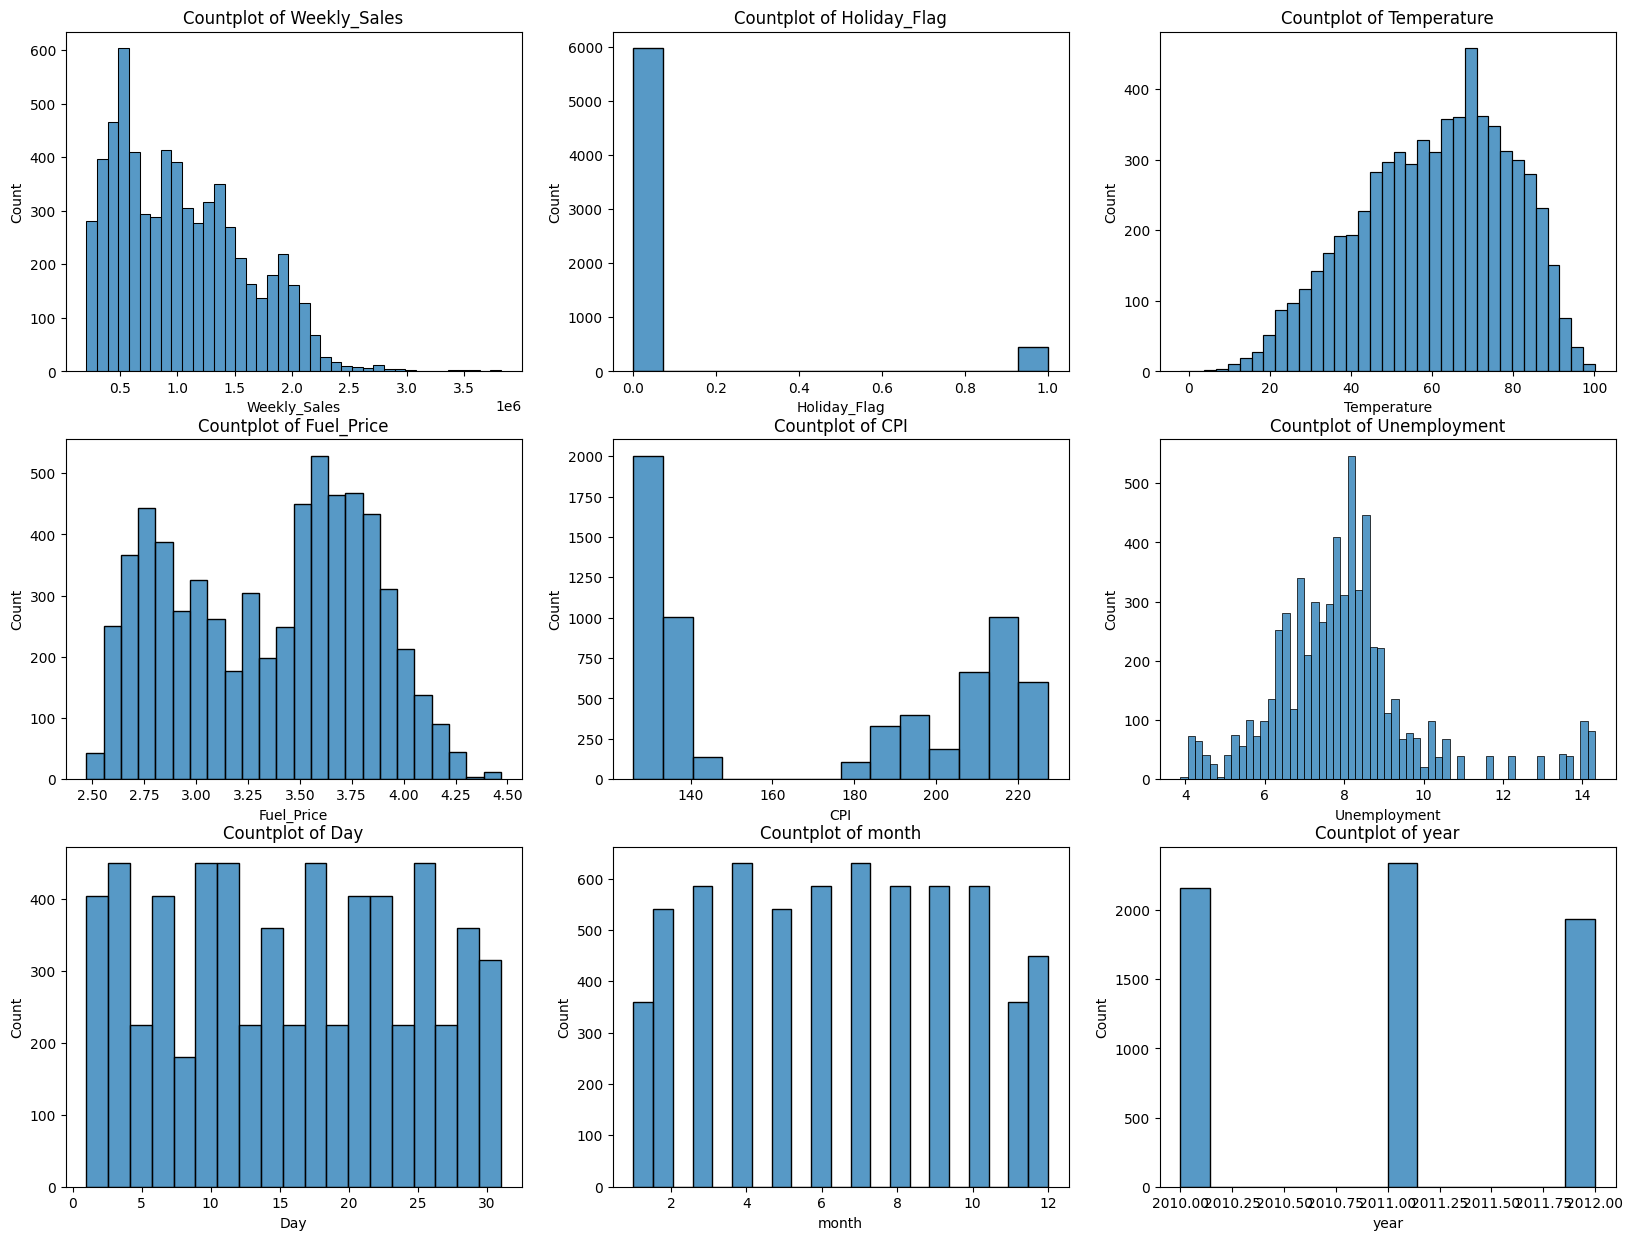

In [17]:
column=['Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment', 'Day', 'month', 'year']

plt.figure(figsize=(20, 15))

for i in range(len(column)):
    plt.subplot(3,3, i + 1)
    sns.histplot(x=df[column[i]])
    plt.title(f'Countplot of {column[i]}')


plt.show()

# check the correlation between the values

In [15]:
corr=df.corr()
corr

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,month,year
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531,1.478526e-15,2.910676e-15,3.474318e-12
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176,-1.740946e-02,7.614332e-02,-1.837754e-02
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960,4.452608e-02,1.229958e-01,-5.678257e-02
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158,2.697332e-02,2.358618e-01,6.426923e-02
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684,2.807253e-02,-4.215590e-02,7.794703e-01
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020,2.684300e-03,4.979672e-03,7.479573e-02
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000,-4.233293e-03,-1.274559e-02,-2.418135e-01
Day,1.478526e-15,-0.017409,4.452608e-02,0.026973,0.028073,0.002684,-0.004233,1.000000e+00,1.519184e-02,6.405867e-03
month,2.910676e-15,0.076143,1.229958e-01,0.235862,-0.042156,0.004980,-0.012746,1.519184e-02,1.000000e+00,-1.944645e-01
year,3.474318e-12,-0.018378,-5.678257e-02,0.064269,0.779470,0.074796,-0.241813,6.405867e-03,-1.944645e-01,1.000000e+00


# plotting heatmap for correlated data

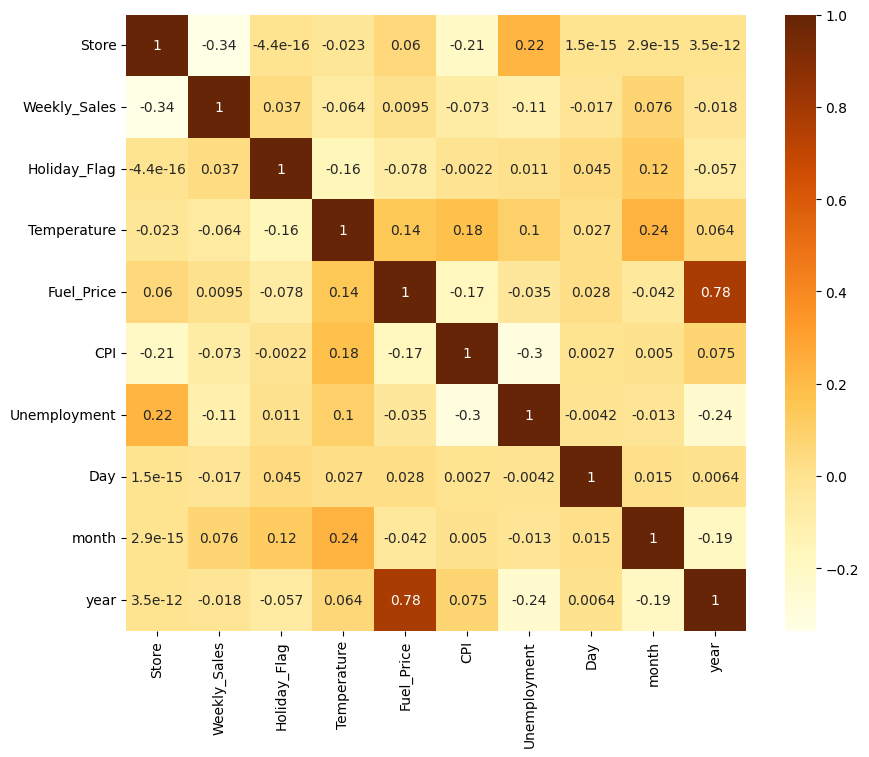

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(data=corr,annot=True,cmap='YlOrBr')
plt.show()

# fetch the average weekly sales and fuel price based on year

In [19]:
df_avg_sales=df.groupby('year')[['Weekly_Sales','Fuel_Price']].mean()
df_avg_sales

,Weekly_Sales,Fuel_Price
year,,
2010,1.059670e+06,2.823767
2011,1.046239e+06,3.561915
2012,1.033660e+06,3.709776


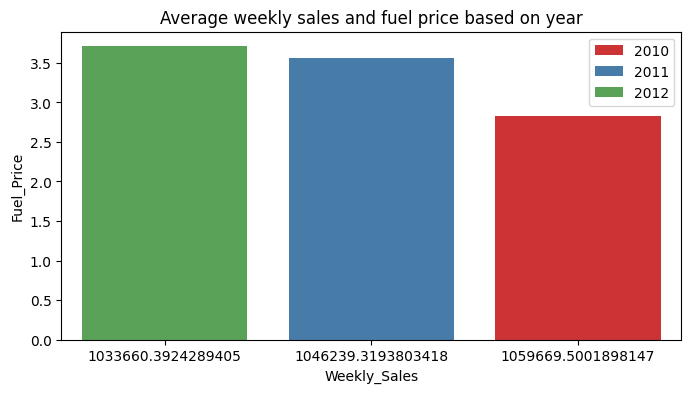

In [30]:
plt.figure(figsize=(8,4))
sns.barplot(data=df_avg_sales,x='Weekly_Sales',y='Fuel_Price',hue='year',palette='Set1')
plt.legend(bbox_to_anchor=(1,1))
plt.title('Average weekly sales and fuel price based on year')
plt.show()

# fetch the average weekly sales and CPI based on year

In [38]:
df_avg_cpi = df.groupby('year')[['Weekly_Sales', 'CPI']].mean()
df_avg_cpi

,Weekly_Sales,CPI
year,,
2010,1.059670e+06,168.101782
2011,1.046239e+06,171.545716
2012,1.033660e+06,175.498781


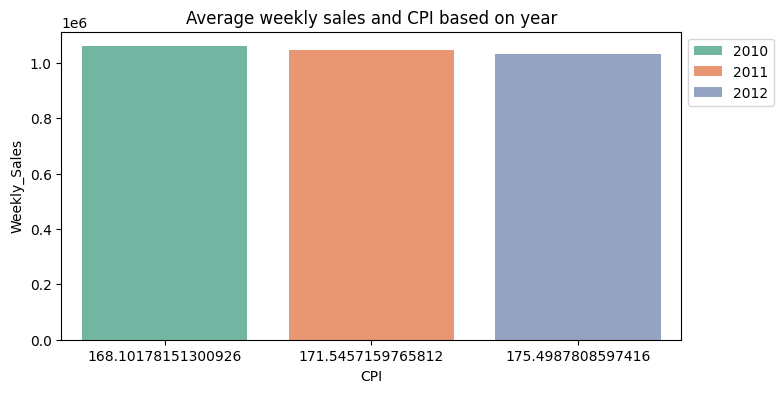

In [41]:
plt.figure(figsize=(8,4))
sns.barplot(data=df_avg_cpi,y='Weekly_Sales',x='CPI',hue='year',palette='Set2')
plt.legend(bbox_to_anchor=(1,1))
plt.title('Average weekly sales and CPI based on year')
plt.show()

# outliers Treatment

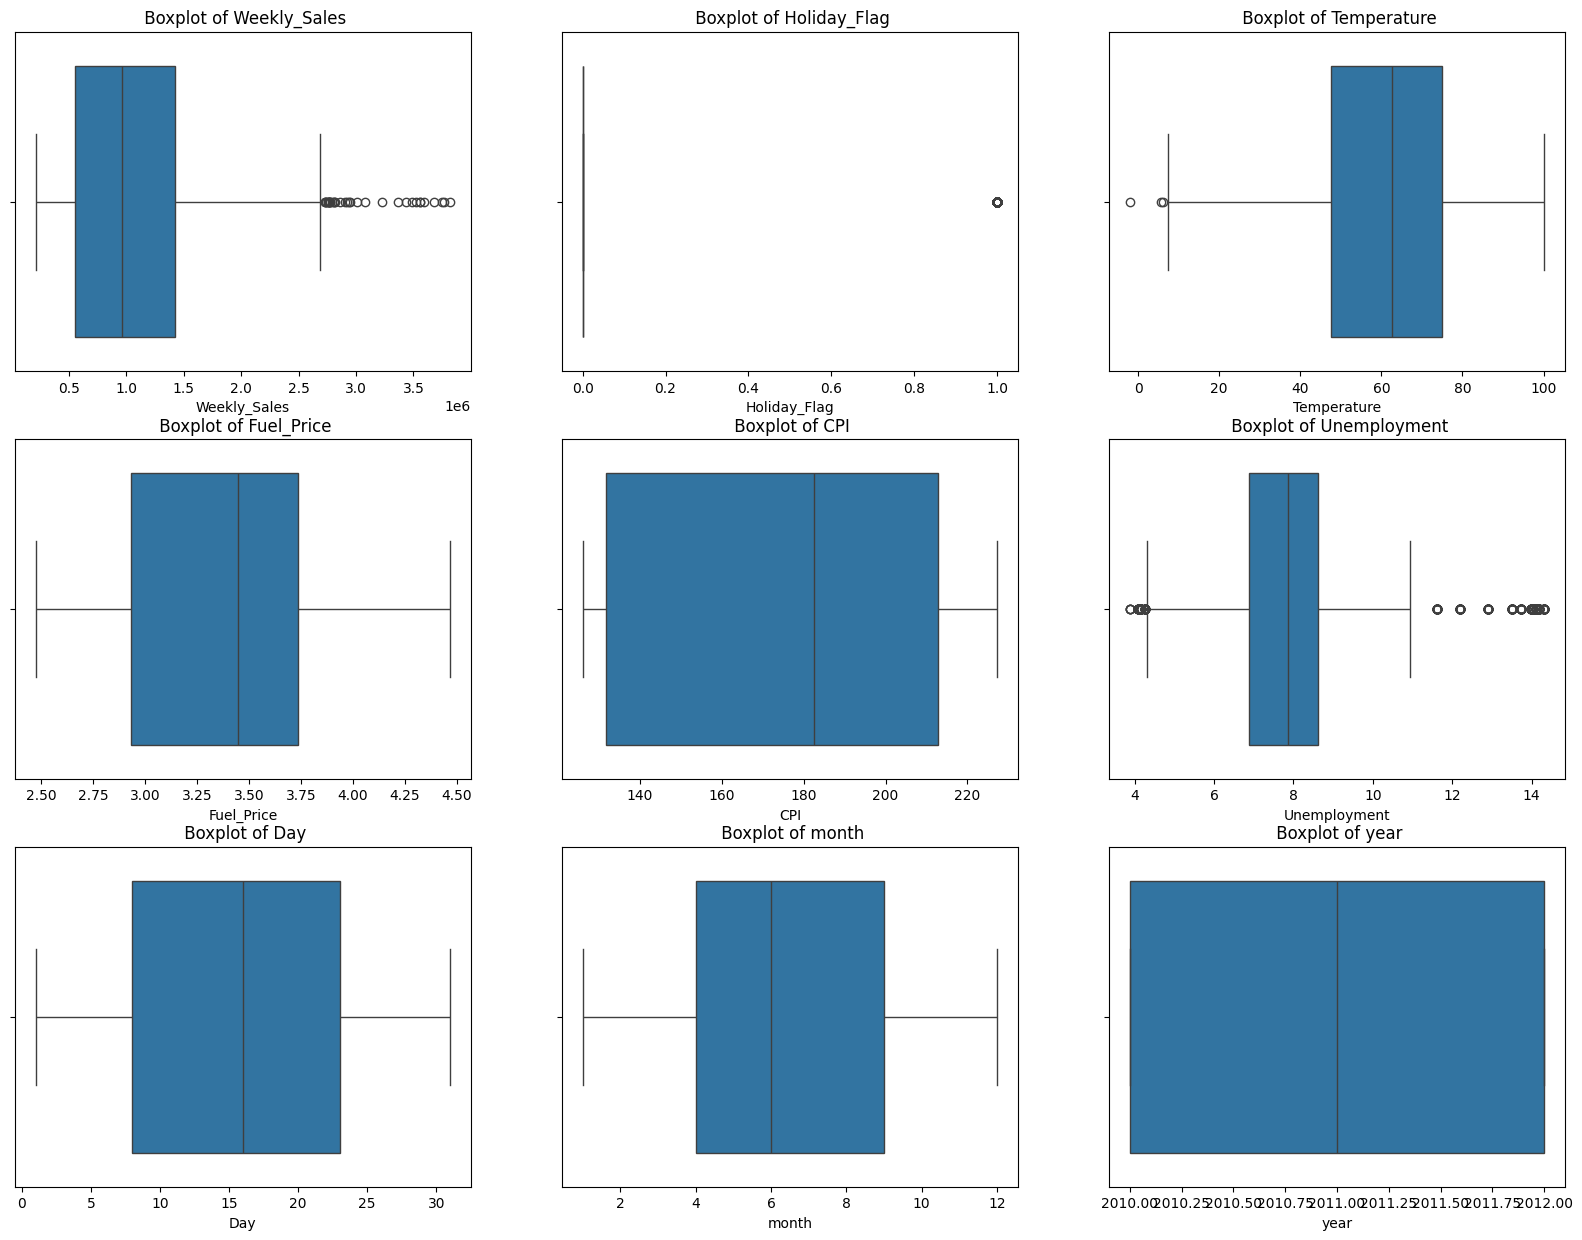

In [18]:

plt.figure(figsize=(20, 15))

for i in range(len(column)):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[column[i]])
    plt.title(f' Boxplot of {column[i]}')


plt.show()

In [19]:
col=['Unemployment','Weekly_Sales']

a=df[col].describe(percentiles=[0.95,0.96,0.97,0.98,0.99]).T
a

,count,mean,std,min,50%,95%,96%,97%,98%,99%,max
Unemployment,6435.0,7.999151e+00,1.875885,3.879,7.874,12.187,13.503,1.373600e+01,14.021,14.180,14.313
Weekly_Sales,6435.0,1.046965e+06,564366.622054,209986.250,960746.040,2049178.512,2081407.462,2.135966e+06,2203919.302,2404035.305,3818686.450


In [20]:
print(df[df['Unemployment']>12.187].shape)
print(df[df['Weekly_Sales']>2049178.512].shape)

(300, 10)
(322, 10)


In [21]:
df['Unemployment']=np.where(df['Unemployment']>12.187,12.187,df['Unemployment'])
df['Weekly_Sales']=np.where(df['Weekly_Sales']>2404035.305	,2404035.305	,df['Weekly_Sales'])

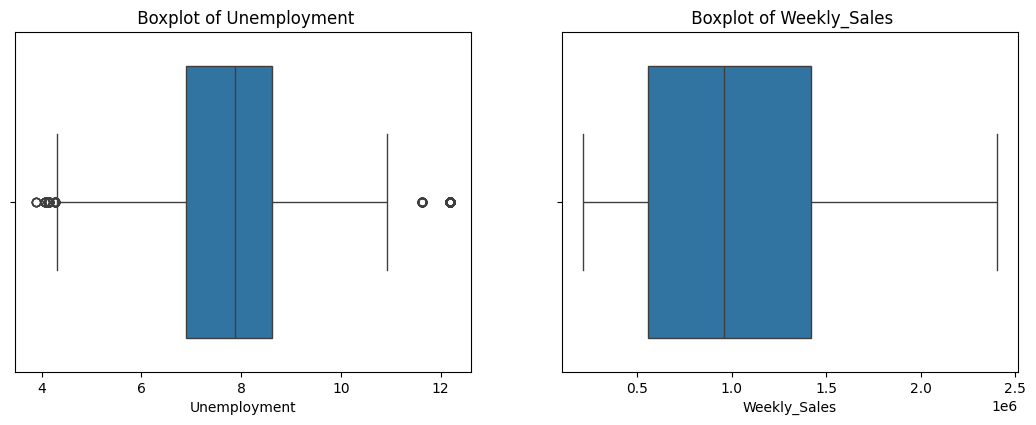

In [22]:
cols=['Unemployment','Weekly_Sales']

plt.figure(figsize=(20, 15))

for i in range(len(cols)):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[cols[i]])
    plt.title(f' Boxplot of {cols[i]}')


plt.show()

# select dependent and independent value

In [23]:
x=df.drop('Weekly_Sales',axis=1)
y=df['Weekly_Sales']
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(6435, 9)
(6435,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


# standardized the data 

In [25]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_sc=sc.fit_transform(df)
df_sc

array([[-1.69397911,  1.09052538, -0.27420425, ..., -1.21966879,
        -1.37352517, -1.21089907],
       [-1.69397911,  1.08737971,  3.64691651, ..., -0.42013476,
        -1.37352517, -1.21089907],
       [-1.69397911,  1.03295891, -0.27420425, ...,  0.37939926,
        -1.37352517, -1.21089907],
       ...,
       [ 1.69397911, -0.55942589, -0.27420425, ..., -0.42013476,
         1.09709243,  1.29864538],
       [ 1.69397911, -0.58907556, -0.27420425, ...,  0.37939926,
         1.09709243,  1.29864538],
       [ 1.69397911, -0.51257628, -0.27420425, ...,  1.17893329,
         1.09709243,  1.29864538]])

# split the data into training and testing data

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=50,test_size=0.3)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4504, 9)
(1931, 9)
(4504,)
(1931,)


# create a function to evaluate ml model performance

In [37]:
from sklearn.metrics import *
def eval_model(model,x_train,x_test,y_train,y_test,mname):
    model.fit(x_train,y_train)
    ypred=model.predict(x_test)
    Train_score=model.score(x_train,y_train)
    Test_score=model.score(x_test,y_test)
    test_mae=mean_absolute_error(y_test,ypred)
    test_mse=mean_squared_error(y_test,ypred)
    test_rmse=np.sqrt(test_mse)
    res=pd.DataFrame({'Train score':Train_score,'Test score':Test_score,'Test_mae':test_mae,'Test_mse':test_mse,'Test_rmse':test_rmse},
                     index=[mname])
    return res,ypred
    

# import ML model

# LR model

In [30]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr_res,lr_ypred=eval_model(lr,x_train,x_test,y_train,y_test,'Linear Reg')
lr_res

,Train score,Test score,Test_mae,Test_mse,Test_rmse
Linear Reg,0.153553,0.132955,428729.051206,2.632675e+11,513096.019304


# DT model

In [32]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(max_depth=10,min_samples_split=8)
dt_res,dt_ypred=eval_model(dt,x_train,x_test,y_train,y_test,'DecisionTree Reg')
dt_res

,Train score,Test score,Test_mae,Test_mse,Test_rmse
DecisionTree Reg,0.976765,0.94373,70839.037241,1.708558e+10,130711.811837


# RF model

In [38]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=30,max_depth=10,min_samples_split=8)
rf_res,rf_ypred=eval_model(rf,x_train,x_test,y_train,y_test,'RandomForest Reg')
rf_res

,Train score,Test score,Test_mae,Test_mse,Test_rmse
RandomForest Reg,0.97818,0.957244,65431.820809,1.298234e+10,113940.079144


# Adaboost model

In [36]:
from sklearn.ensemble import AdaBoostRegressor
ad=AdaBoostRegressor(estimator=dt,n_estimators=30)
ad_res,ad_ypred=eval_model(ad,x_train,x_test,y_train,y_test,'Adaboost Reg')
ad_res

,Train score,Test score,Test_mae,Test_mse,Test_rmse
Adaboost Reg,0.992009,0.965692,59839.851752,1.041717e+10,102064.539959


# Inference

#### <br> Adaboost regressor model is best model <br>

# save the model

In [56]:
import pickle

In [59]:
pickle.dump(lr,open('lr_model_walmart_weekly_sales_prediction.pkl','wb'))
pickle.dump(dt,open('dt_model_walmart_weekly_sales_prediction.pkl','wb'))
pickle.dump(rf,open('rf_model_walmart_weekly_sales_prediction.pkl','wb'))
pickle.dump(ad,open('ad_model_walmart_weekly_sales_prediction.pkl','wb'))